# **Тестовое задание "Onpoint"**

## **Предобрабрика данных**

In [1]:
# импортируем библиотеки
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import warnings


In [2]:
# скроем будущие предупреждения об ошибках
warnings.filterwarnings('ignore')

### Работа с данными по email-рассылкам

In [3]:
# загружаем таблицу c данными по email
url='https://drive.google.com/file/d/1B5XXkUqk0oMX6Jq-W75czppNpK8U8TP9/view?usp=share_link'
file_id=url.split('/')[-2]
dwn_url='https://drive.google.com/uc?id=' + file_id
email_df = pd.read_csv(dwn_url, sep=';', comment='#')

In [4]:
# удалим строки, в которых нет никакой информации (все столбцы пустые)
email_df = email_df.dropna(axis = 0, how='all')
# выведем первые 5 строк
email_df.head()

,CONTACT_ID,BRAND,PREFERENCE,EMAIL_OPENED,EMAIL_CLICKED,STATUS,QUADRANT,SEND_DATE,ASSET_ID,CAMPAIGN_ID,...,EMAIL_SENT,EMAIL_BOUNCED,BOUNCE_DATE,EMAIL_UNSUBSCRIBED,SPECIALITY,PROMOTION_GROUP,TARGET_AUDIENCE,MAX_SEND_DATE,Pre_header,Subject_line
0,9d2c3371-1eb7-4a9f-9b95-a9a682218af5,allerway,NaN,0.0,0.0,Целевой,Q2,13.10.2022,5087.0,5843.0,...,1.0,0.0,NaN,0.0,дерматолог,OTC-GEN,OTC GEN Дерматологи A Окт22-Мар23,17.01.2023,Представляем новые данные по хронической крапи...,Сомнения насчёт длительного применения АГП?
1,778159e5-a3ac-47ff-8a4d-3a576ffc129f,allerway,NaN,0.0,0.0,Целевой,Q2,20.10.2022,5312.0,5911.0,...,1.0,0.0,NaN,0.0,дерматолог,OTC-GEN,OTC GEN Дерматологи B Окт22-Мар23,17.01.2023,Для купирования зуда при хронической крапивнице,Новая схема повышения дозировки АГП 2-го покол...
2,903997fe-dbec-43e7-9717-a43d78ecceea,allerway,NaN,0.0,0.0,Целевой,Q1,20.10.2022,5312.0,5911.0,...,1.0,0.0,NaN,0.0,дерматолог,OTC-GEN,OTC GEN Дерматологи A Окт22-Мар23,17.01.2023,Для купирования зуда при хронической крапивнице,Новая схема повышения дозировки АГП 2-го покол...
3,b1a68d21-82ab-4bef-95a1-f6babc503ac3,allerway,NaN,0.0,0.0,Целевой,Q1,28.10.2022,5360.0,6007.0,...,1.0,0.0,NaN,0.0,дерматолог,OTC-GEN,OTC GEN Дерматологи A Окт22-Мар23,17.01.2023,Выбор АГП с позиции доказательной медицины,Как аллергику не спать на работе?
4,c0b088f6-3072-4164-8f42-cb1dd10a2958,allerway,NaN,0.0,0.0,Нецелевой,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Видно, что есть пропуски, далее мы посмотрим сколько их в каждом столбце, а также проверим тип данных.

In [5]:
# выведем общую информацию по дф
email_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20877 entries, 0 to 20876
Data columns (total 31 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   CONTACT_ID          20877 non-null  object 
 1   BRAND               20877 non-null  object 
 2   PREFERENCE          0 non-null      float64
 3   EMAIL_OPENED        20877 non-null  float64
 4   EMAIL_CLICKED       20877 non-null  float64
 5   STATUS              20877 non-null  object 
 6   QUADRANT            2943 non-null   object 
 7   SEND_DATE           2943 non-null   object 
 8   ASSET_ID            2943 non-null   float64
 9   CAMPAIGN_ID         2943 non-null   float64
 10  CAMPAIGN_NAME       2943 non-null   object 
 11  CAMPAIGN_SEGMENT    2943 non-null   object 
 12  KEY_MESSAGE         0 non-null      float64
 13  FUNNEL_STAGE        0 non-null      float64
 14  CONTENT_TYPE        0 non-null      float64
 15  CONTENT_FORMAT      0 non-null      float64
 16  STRA

In [6]:
# проверим кол-во явных дубликатов (значения во всех строках совпадают)
email_df.duplicated().sum()

13405

У нас целых 13405 явных дубликатов - посмотрим на эти строки.

In [7]:
# смотрим на строки - явные дубликаты
email_df[email_df.duplicated()]

,CONTACT_ID,BRAND,PREFERENCE,EMAIL_OPENED,EMAIL_CLICKED,STATUS,QUADRANT,SEND_DATE,ASSET_ID,CAMPAIGN_ID,...,EMAIL_SENT,EMAIL_BOUNCED,BOUNCE_DATE,EMAIL_UNSUBSCRIBED,SPECIALITY,PROMOTION_GROUP,TARGET_AUDIENCE,MAX_SEND_DATE,Pre_header,Subject_line
6,18c4e276-e085-46f6-95d0-e73b95cf231c,allerway,NaN,0.0,0.0,Нецелевой,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
95,CRMid0013532,allerway,NaN,0.0,0.0,Нецелевой,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
102,6ade6bb7-422d-4eee-8315-511551f6dfd5,allerway,NaN,0.0,0.0,Нецелевой,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
205,7098707d-4359-4c2e-be26-20e5962ec57e,allerway,NaN,0.0,0.0,Нецелевой,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
240,2addc2d7-ec8c-490a-9c26-d789e22107f2,allerway,NaN,1.0,0.0,Нецелевой,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20852,3ca1306a-7d0e-46d6-ae6e-6b2d7e9aa042,allerway,NaN,1.0,0.0,Целевой,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20853,68d8d257-2e0a-4171-96ea-891da63db767,allerway,NaN,0.0,0.0,Целевой,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20859,091d7232-7585-4849-bd35-afc5c6832580,allerway,NaN,0.0,0.0,Нецелевой,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20871,d974e377-19f9-4084-ad24-519204b17a4d,allerway,NaN,0.0,0.0,Целевой,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


В большинстве своем во всех столбцах у нас пропуски, поэтому наличие данных строк в 2 экземпляре нам не принесет никакой пользы. Единственное, если бы данные собрались более точно, то, возможно, информация в столбце "SEND_DATE" позволила бы дифференцировать данные строки и сделать их уникальными, но, к сожалению, у нас нет такой информации и мы не можем утверждать, что эти логи относятся к разным отправкам писем.

Далее мы удалими эти дублирующиеся строки, оставив только первые (с меньшим индексом) строки с такой информацией.

In [8]:
# создадим переменную для дф с явными дубликаты - наслучай дальнейшего анализа
email_w_duplicates = email_df.copy()

# удалим из основного дф явные дубликаты
email_df = email_df.drop(email_df[email_df.duplicated()].index)

# проверим корректность наших изменений
email_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7472 entries, 0 to 20876
Data columns (total 31 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   CONTACT_ID          7472 non-null   object 
 1   BRAND               7472 non-null   object 
 2   PREFERENCE          0 non-null      float64
 3   EMAIL_OPENED        7472 non-null   float64
 4   EMAIL_CLICKED       7472 non-null   float64
 5   STATUS              7472 non-null   object 
 6   QUADRANT            2919 non-null   object 
 7   SEND_DATE           2919 non-null   object 
 8   ASSET_ID            2919 non-null   float64
 9   CAMPAIGN_ID         2919 non-null   float64
 10  CAMPAIGN_NAME       2919 non-null   object 
 11  CAMPAIGN_SEGMENT    2919 non-null   object 
 12  KEY_MESSAGE         0 non-null      float64
 13  FUNNEL_STAGE        0 non-null      float64
 14  CONTENT_TYPE        0 non-null      float64
 15  CONTENT_FORMAT      0 non-null      float64
 16  STRAT

Комментарий к выводам по дф с информацией по email-рассылкам:

1. у нас все столбцы прописаны капсом (прописными буквами) - приведем их к нижнему регистру, для более удобной работы с ними;
2. есть столбцы с датами, но тип данных у них не соответствующий - исправим это;
3. у нас есть около 10 столбцов, в которых нет никакой информации - это "PREFERENCE", "KEY_MESSAGE", "FUNNEL_STAGE", "CONTENT_TYPE", "CONTENT_FORMAT", "STRATEGIC_MESSAGE", "CONTENT_TOPIC", "KOL_NAME", "COMPETITOR".

Поскольку описания данных не было предоставлено, могу предположить, что данная проблема могла возникнуть по следующим причинам:

- информация в данных столбцах собирается для других маркетинговых активностей, например, для взаимодействия в viber, то есть в случае с email-рассылкой данные столбцы и не должны быть заполнены, так как у нас есть другие столбцы, в которых отображается информация по взаимодействиям с email-рассылкой;
- произошел сбой в системе сбора данных, поэтому стоит проверить корректность работы серсвиса, возможны и др. технические проблемы;

Если данная ситуация возникла из-за причины №1, то я рекомендую отделить сбор данных по email-рассылкам от других маркетинговых активностей, где набор столбцов с информацией отличается, чтобы не тратить дополнительные ресурсы на хранение пустых столбцов, поясню:

- Несмотря на то, что столбец "PREFERENCE" имеет ненулевое значение 0, он все равно может занимать некоторое количество памяти в вашем хранилище данных, в зависимости от типа данных столбца. В этом случае тип данных - float64, для которого обычно требуется 8 байт на запись. Итак, если у вас есть 20 877 записей в столбце, это займет порядка 20 877 * 8 = 167 016 байт - около 167 КБ памяти, это только по столбцу "PREFERENCE". **Оптимизация сбора данных не только сэкономит ресурсы компании на хранение данных, но и позволит ускроить процесс выгрузки и работы с даннми - ведь их объем уменьшится.**

Для начала исправим вышеупомянутые проблемы, а далее проверим остальные нюансы.

In [9]:
# приводим названия столбцов к нижнему регистру(snake_case)
email_df.columns = email_df.columns.str.lower()

In [10]:
# изменим тип данных в столбцах с датой на соответствующий
email_df['send_date'] = pd.to_datetime(email_df['send_date'])
email_df['max_send_date'] = pd.to_datetime(email_df['max_send_date'])

In [11]:
# удалим столбцы, в которых нет никакой информации
email_df.drop(email_df.columns[[2] + list(range(12, 20))], axis=1, inplace=True)

In [12]:
# проверим корректность совершенных изменений
email_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7472 entries, 0 to 20876
Data columns (total 22 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   contact_id          7472 non-null   object        
 1   brand               7472 non-null   object        
 2   email_opened        7472 non-null   float64       
 3   email_clicked       7472 non-null   float64       
 4   status              7472 non-null   object        
 5   quadrant            2919 non-null   object        
 6   send_date           2919 non-null   datetime64[ns]
 7   asset_id            2919 non-null   float64       
 8   campaign_id         2919 non-null   float64       
 9   campaign_name       2919 non-null   object        
 10  campaign_segment    2919 non-null   object        
 11  communication       2919 non-null   object        
 12  email_sent          2919 non-null   float64       
 13  email_bounced       2919 non-null   float64    

Все вышеупомянутые проблемы - исправлены, однако помимо них есть еще несколько нюансов:

- у нас все столбцы с типом данных float - содержат булевые значения (0 или 1), поэтому их нужно привести к типу int, однако некоторые из столбцов содержат также пропуски, поэтому тип данных мы сможем поменять лишь там, где нет пропусков;
- в столбец "bounce_date" лишь в 6 строках есть ненулевых значений - однако в данном случае это "+", ведь данный столбец содержит информацию о том, когда нас оповестили, что наш email не дошел до юзера, а значит **bounce_rate = 0,029%, что является крайне хорошим показателем**. В среднем по рынку **bounce_rate составляет 1-2%**, все что выше 5% является показателем проблем в email маркетинге. Некоторые [маркетинговые агенства](https://www.brevo.com/blog/email-marketing-benchmarks/) имеют bounce_rate порядка 0,5%.

Таким образом, **проблем с тем, что наши письма не доходят до клиентов - нет.**

In [13]:
# приведем тип данных к инту в столбцах, где нет пропусков и тип данных флоат
for column in ['email_clicked', 'email_opened']:
    email_df[column] = email_df[column].astype('int8')

In [14]:
# проверим корректность совершенных изменений
email_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7472 entries, 0 to 20876
Data columns (total 22 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   contact_id          7472 non-null   object        
 1   brand               7472 non-null   object        
 2   email_opened        7472 non-null   int8          
 3   email_clicked       7472 non-null   int8          
 4   status              7472 non-null   object        
 5   quadrant            2919 non-null   object        
 6   send_date           2919 non-null   datetime64[ns]
 7   asset_id            2919 non-null   float64       
 8   campaign_id         2919 non-null   float64       
 9   campaign_name       2919 non-null   object        
 10  campaign_segment    2919 non-null   object        
 11  communication       2919 non-null   object        
 12  email_sent          2919 non-null   float64       
 13  email_bounced       2919 non-null   float64    

Все преобразования проведены верно, однако можно заметить, что у нас есть 2919 строки, где нет пропусков - создадим отфильтрованную версию таблицы для дальнейшего анализа.

In [15]:
# создадим отфильтрованную версию дф
email_filtred = email_df.dropna(subset=email_df.columns.difference(['bounce_date']))

# поменяем тип данных у столбцов с float64 на int8
for column in email_filtred.select_dtypes(include='float64').columns:
    email_filtred[column] = email_filtred[column].astype('int16')

# проверим корректность созданного дф
email_filtred.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2919 entries, 0 to 20876
Data columns (total 22 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   contact_id          2919 non-null   object        
 1   brand               2919 non-null   object        
 2   email_opened        2919 non-null   int8          
 3   email_clicked       2919 non-null   int8          
 4   status              2919 non-null   object        
 5   quadrant            2919 non-null   object        
 6   send_date           2919 non-null   datetime64[ns]
 7   asset_id            2919 non-null   int16         
 8   campaign_id         2919 non-null   int16         
 9   campaign_name       2919 non-null   object        
 10  campaign_segment    2919 non-null   object        
 11  communication       2919 non-null   object        
 12  email_sent          2919 non-null   int16         
 13  email_bounced       2919 non-null   int16      

На этом этап предобработки данных таблицы с информацией по email-рассылкам подошел к концу.

Переходим к работе с таблицей про viber

### Работа с данными по viber

In [16]:
# загружаем таблицу c данными по viber
url='https://drive.google.com/file/d/1dED25qGFs-33C2wuky9paYqLS4LFlKqn/view?usp=share_link'
file_id=url.split('/')[-2]
dwn_url='https://drive.google.com/uc?id=' + file_id
viber_df = pd.read_csv(dwn_url, sep=';', comment='#')

In [17]:
# удалим строки, в которых нет никакой информации (все столбцы пустые)
viber_df = viber_df.dropna(axis = 0, how = 'all')
# выведем первые 5 строк
viber_df.head()

,CONTACT_ID,BRAND,PREFERENCE,STATUS,QUADRANT,SEND_DATE,CAMPAIGN_ID,CAMPAIGN_NAME,CAMPAIGN_SEGMENT,KEY_MESSAGE,...,SPECIALITY,PROMOTION_GROUP,TARGET_AUDIENCE,MAIN_LINK_CLICKS,MAIN_LINK_CLICKED,OTHER_LINK_CLICKS,VIBER_SENT,VIBER_DELIVERED,VIBER_READ,MAX_SEND_DATE
0,000625e0-ec9f-4abe-8d37-a4e0b7f1a855,allerway,NaN,Целевой,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,000625e0-ec9f-4abe-8d37-a4e0b7f1a855,allerway,NaN,Целевой,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,000625e0-ec9f-4abe-8d37-a4e0b7f1a855,allerway,NaN,Целевой,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,001b19ba-3e06-4de2-b2fc-313b2d51cddd,allerway,NaN,Нецелевой,Q2,4-Oct-2022,5786.0,derma – all – all – allerway – 04.10.2022 – 04...,derma,TBD,...,дерматолог,OTC-2,OTC 2 Дерматологи B Окт22-Мар23,0.0,0.0,0.0,1.0,1.0,0.0,20.01.2023
4,001b19ba-3e06-4de2-b2fc-313b2d51cddd,allerway,NaN,Нецелевой,Q2,25-Oct-2022,5949.0,derma – all – all – allerway – 16.09.2022 – 16...,derma,TBD,...,дерматолог,OTC-2,OTC 2 Дерматологи B Окт22-Мар23,0.0,0.0,0.0,1.0,1.0,1.0,20.01.2023


In [18]:
# смотрим общую информацию по дф
viber_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39187 entries, 0 to 39186
Data columns (total 28 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CONTACT_ID         39187 non-null  object 
 1   BRAND              39187 non-null  object 
 2   PREFERENCE         0 non-null      float64
 3   STATUS             39187 non-null  object 
 4   QUADRANT           15245 non-null  object 
 5   SEND_DATE          15245 non-null  object 
 6   CAMPAIGN_ID        15245 non-null  float64
 7   CAMPAIGN_NAME      15245 non-null  object 
 8   CAMPAIGN_SEGMENT   15245 non-null  object 
 9   KEY_MESSAGE        15245 non-null  object 
 10  FUNNEL_STAGE       15245 non-null  object 
 11  CONTENT_TYPE       15245 non-null  object 
 12  CONTENT_FORMAT     15245 non-null  object 
 13  STRATEGIC_MESSAGE  15245 non-null  object 
 14  CONTENT_TOPIC      15245 non-null  object 
 15  KOL_NAME           15245 non-null  object 
 16  COMPETITOR         152

In [19]:
# проверим кол-во явных дубликатов (значения во всех строках совпадают)
viber_df.duplicated().sum()

21959

В таблице с данными по viber явных дубликатов еще больше - **21.959**

In [20]:
# смотрим на строки - явные дубликаты
viber_df[viber_df.duplicated()]

,CONTACT_ID,BRAND,PREFERENCE,STATUS,QUADRANT,SEND_DATE,CAMPAIGN_ID,CAMPAIGN_NAME,CAMPAIGN_SEGMENT,KEY_MESSAGE,...,SPECIALITY,PROMOTION_GROUP,TARGET_AUDIENCE,MAIN_LINK_CLICKS,MAIN_LINK_CLICKED,OTHER_LINK_CLICKS,VIBER_SENT,VIBER_DELIVERED,VIBER_READ,MAX_SEND_DATE
1,000625e0-ec9f-4abe-8d37-a4e0b7f1a855,allerway,NaN,Целевой,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,000625e0-ec9f-4abe-8d37-a4e0b7f1a855,allerway,NaN,Целевой,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11,003d9821-1349-42fd-88fd-45b29173f6c9,allerway,NaN,Целевой,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13,0048249b-2c6e-4a88-9ccc-97d56c412866,allerway,NaN,Нецелевой,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
15,00579f70-eca9-466b-82ff-ae054b06c4f9,allerway,NaN,Нецелевой,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39179,ffc66007-1221-4f5a-bfeb-ffb87185d13d,allerway,NaN,Нецелевой,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39180,ffc8c46b-7073-4a03-a4d1-ee8030a77f47,allerway,NaN,Нецелевой,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39181,ffc8c46b-7073-4a03-a4d1-ee8030a77f47,allerway,NaN,Нецелевой,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39185,fffa48b1-6637-44d6-8d6e-e202197c9228,allerway,NaN,Нецелевой,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Комментарий к выводам по дф с информацией по viber:

В целом, ситуация аналогичная:

1. у нас все столбцы прописаны капсом (прописными буквами) - приведем их к нижнему регистру, для более удобной работы с ними;
2. есть столбцы с датами, но тип данных у них не соответствующий - исправим это;
3. столбец "PREFERENCE" все также не содержит никакой информации, а вот остальные столбцы уже заполнены какой-либо информацией. Поэтому удалим только столбец "PREFERENCE";
4. а также у нас опять не по всем контактам есть детальная информация - нужно будет сделать фильтрованный дф, а в нем мы сможем поменять тип данных с флоат на инт.

In [21]:
# создадим переменную для дф с явными дубликаты - наслучай дальнейшего анализа
viber_w_duplicates = viber_df.copy()

# удалим из основного дф явные дубликаты
viber_df = viber_df.drop(viber_df[viber_df.duplicated()].index)

# приводим названия столбцов к нижнему регистру(snake_case)
viber_df.columns = viber_df.columns.str.lower()

# изменим тип данных в столбцах с датой на соответствующий
viber_df['send_date'] = pd.to_datetime(viber_df['send_date'])
viber_df['max_send_date'] = pd.to_datetime(viber_df['max_send_date'])

# удалим столбцы, в которых нет никакой информации
viber_df.drop(viber_df.columns[2], axis=1, inplace=True)

# проверим корректность наших изменений
viber_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17228 entries, 0 to 39184
Data columns (total 27 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   contact_id         17228 non-null  object        
 1   brand              17228 non-null  object        
 2   status             17228 non-null  object        
 3   quadrant           13360 non-null  object        
 4   send_date          13360 non-null  datetime64[ns]
 5   campaign_id        13360 non-null  float64       
 6   campaign_name      13360 non-null  object        
 7   campaign_segment   13360 non-null  object        
 8   key_message        13360 non-null  object        
 9   funnel_stage       13360 non-null  object        
 10  content_type       13360 non-null  object        
 11  content_format     13360 non-null  object        
 12  strategic_message  13360 non-null  object        
 13  content_topic      13360 non-null  object        
 14  kol_na

In [22]:
# создадим отфильтрованную версию дф
viber_filtred = viber_df.dropna()

# поменяем тип данных у столбцов с float64 на int8
for column in viber_filtred.select_dtypes(include='float64').columns:
    viber_filtred[column] = viber_filtred[column].astype('int8')

# проверим корректность созданного дф
viber_filtred.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13360 entries, 3 to 39184
Data columns (total 27 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   contact_id         13360 non-null  object        
 1   brand              13360 non-null  object        
 2   status             13360 non-null  object        
 3   quadrant           13360 non-null  object        
 4   send_date          13360 non-null  datetime64[ns]
 5   campaign_id        13360 non-null  int8          
 6   campaign_name      13360 non-null  object        
 7   campaign_segment   13360 non-null  object        
 8   key_message        13360 non-null  object        
 9   funnel_stage       13360 non-null  object        
 10  content_type       13360 non-null  object        
 11  content_format     13360 non-null  object        
 12  strategic_message  13360 non-null  object        
 13  content_topic      13360 non-null  object        
 14  kol_na

### **Итоги предобработки данных:**

- названия столбцов приведены к snake_case;
- удалены явные дубликаты - из таблицы с информацией по email-рассылке – **13405**, по viber – **21959**. Данные дубли возникли по причине того, что у нас имеются пропуски во многих столбцах, прежде всего в столбце с датой;
- также в обоих таблицах были удалены лишние столбцы (в них были только пропуски), а тип данных некоторых столбцов приведен к соответствующему в нем данным;
- созданы таблица без пропусков – по данным email-рассылки с **2919** строк, а по viber – с **13360**, по которым и будет проводиться дальнейший анализ;
- **bounce_rate составил 0,029%, в среднем по рынку bounce_rate составляет 1-2%**

## **Исследовательский анализ данных**

### Анализ данных email-рассылки

In [23]:
# напишем функцию для расчета метрик email-рассылки по разным группировкам
def metrics(df):
  # считаем open rate email-рассылки
  df['open_rate,%'] = round(df['am_opened'] / df['am_sent'] * 100, 2)

  # считаем click-through rate email-рассылки
  df['ctr,%'] = round(df['am_clicked'] / df['am_sent'] * 100, 2)

  # считаем click-to-open rate email-рассылки
  df['click_2open_rate,%'] = round(df['am_clicked'] / df['am_opened'] * 100, 2)


#### Расчет метрик по кампаниям по email-рассылке

In [24]:
# создадим отдельную таблицу с расчетом метрик по email-рассылкам по рекламным кампаниям
email_campaign_analysis = (email_filtred.groupby('campaign_id')
              .agg({
                  'contact_id': 'count',
                  'email_opened': 'sum',
                  'email_clicked': 'sum'
              })
              .rename(columns={
                  'contact_id': 'am_sent',
                  'email_opened': 'am_opened',
                  'email_clicked': 'am_clicked',
                               })
)

# добавим строку с суммарным значением
email_campaign_analysis.loc['total'] = email_campaign_analysis.sum()

# применяем функцию и расчитываем open rate, click-through rate и click-to-open rate email-рассылки
metrics(email_campaign_analysis)

email_campaign_analysis

,am_sent,am_opened,am_clicked,"open_rate,%","ctr,%","click_2open_rate,%"
campaign_id,,,,,,
5843,251,75,5,29.88,1.99,6.67
5844,1,0,0,0.00,0.00,NaN
5911,288,69,5,23.96,1.74,7.25
6006,1,0,0,0.00,0.00,NaN
6007,276,54,1,19.57,0.36,1.85
6008,195,45,2,23.08,1.03,4.44
6151,181,55,0,30.39,0.00,0.00
6152,152,42,0,27.63,0.00,0.00
6182,216,75,11,34.72,5.09,14.67


#### Графики по email-рассылкам

In [25]:
def campaign_analysis_plot(df, name_of_column, name_for_captions, channel, quarter=None):
    # сортируем дф для создания читаемого гарфика
    df = df.sort_values(name_of_column, ascending=False).reset_index()

    # создаем переменную с внутренними подписями
    hover_labels = [f"Campaign ID: {campaign_id}<br>{name_for_captions}: {open_rate}%" for campaign_id, open_rate in zip(df['campaign_id'], df[name_of_column])]

    # создаем переменную с внешними подписями
    labels = [f"ID: {campaign_id}<br>{open_rate}%" for campaign_id, open_rate in zip(df['campaign_id'], df[name_of_column])]

    # создаем график
    fig = go.Figure(go.Bar(
        y=df.index,
        x=df[name_of_column],
        name=name_for_captions,
        orientation='h',
        marker=dict(
            color=df.index,
            colorscale='YlGnBu',
            reversescale=True
        ),
        hovertext=hover_labels,
        hoverinfo='text',
        text=labels,
        textposition='outside'
    ))

    # обновляем лэйаут
    if quarter is None:
        fig.update_layout(
            title=f'Сравнение {name_for_captions} по {channel}-рассылкам',
            xaxis_title=f'{name_for_captions}, %',
            yaxis_title='индекс кампании из таблицы',
            yaxis=dict(
                title_font=dict(size=12)
            ),
            height=650,
            width=1250
        )
    else:
        fig.update_layout(
            title=f'Сравнение {name_for_captions} по {channel}-рассылкам в {quarter}',
            xaxis_title=f'{name_for_captions}, %',
            yaxis_title='индекс кампании из таблицы',
            yaxis=dict(
                title_font=dict(size=12)
            ),
            height=650,
            width=1250
        )

    fig.show()

In [26]:
# строим график по open rate по email-рассылкам
campaign_analysis_plot(email_campaign_analysis, 'open_rate,%', 'open rate', 'email')

In [27]:
# строим график по CTR по email-рассылкам
campaign_analysis_plot(email_campaign_analysis, 'ctr,%', 'CTR', 'email')

In [28]:
# строим график по click-to-open-rate по email-рассылкам
campaign_analysis_plot(email_campaign_analysis, 'click_2open_rate,%', 'click-to-open-rate', 'email')

#### Расчет метрик в Q4 по email-рассылке

In [29]:
# создадим отдельную таблицу с расчетом метрик по email-рассылкам по рекламным кампаниям в Q4
q4_email = (email_filtred.query('quadrant == "Q4"')
              .groupby('campaign_id')
              .agg({
                  'contact_id': 'count',
                  'email_opened': 'sum',
                  'email_clicked': 'sum'
              })
              .rename(columns={
                  'contact_id': 'am_sent',
                  'email_opened': 'am_opened',
                  'email_clicked': 'am_clicked',
                               })
)

# добавим строку с суммарным значением
q4_email.loc['total'] = q4_email.sum()

# применяем функцию и расчитываем open rate, click-through rate и click-to-open rate email-рассылки
metrics(q4_email)

q4_email

,am_sent,am_opened,am_clicked,"open_rate,%","ctr,%","click_2open_rate,%"
campaign_id,,,,,,
5843,46,13,2,28.26,4.35,15.38
5911,59,12,1,20.34,1.69,8.33
6007,55,10,0,18.18,0.00,0.00
6008,36,6,0,16.67,0.00,0.00
6151,32,12,0,37.50,0.00,0.00
6152,23,8,0,34.78,0.00,0.00
6182,40,11,3,27.50,7.50,27.27
6233,27,9,0,33.33,0.00,0.00
6498,55,10,1,18.18,1.82,10.00


##### Графики по Q4 по email-рассылкам

In [30]:
# строим график по open rate по email-рассылкам в Q4
campaign_analysis_plot(q4_email, 'open_rate,%', 'open rate', 'email', 'Q4')

In [31]:
# строим график по CTR по email-рассылкам в Q4
campaign_analysis_plot(q4_email, 'ctr,%', 'CTR', 'email', 'Q4')

In [32]:
# строим график по click-to-open-rate по email-рассылкам в Q4
campaign_analysis_plot(q4_email, 'click_2open_rate,%', 'click-to-open-rate', 'email', 'Q4')

#### Расчет ER по email-рассылке

In [33]:
# напишем функцию для расчета ER
def engagement_rate(df, first_action_weight, second_action_weight):
  df['ER, %'] = round(((df['am_opened'] * first_action_weight) + (df['am_clicked'] * second_action_weight)) / df['am_sent'] * 100, 1)


Далее мы перейдем к расчету ER по email-рассылкам, стоит учесть несколько моментов:

- в нашей фильтрованной таблице все письма, которые были отправлены - дошли до пользователей (поэтому мы можем использовать "count" по столбцу "email_sent");
- а вот подсчет открытых писем и кликов будет уже производится с использованием "sum"

In [34]:
# создадим отдельную таблицу с расчетом метрик по email-рассылкам по рекламным кампаниям в Q4
users_email = (email_filtred
              .groupby('contact_id', as_index=False)
              .agg({
                  'email_sent': 'count',
                  'email_opened': 'sum',
                  'email_clicked': 'sum'
              })
              .rename(columns={
                  'contact_id': 'user_id',
                  'email_sent': 'am_sent',
                  'email_opened': 'am_opened',
                  'email_clicked': 'am_clicked'
                               })
)

engagement_rate(users_email, 1, 2)
users_email.sort_values('ER, %', ascending=False)

,user_id,am_sent,am_opened,am_clicked,"ER, %"
146,4933a438-7a70-46bb-9b92-3f4364772df4,5,5,1,140.0
376,c3935fb4-2de6-43e6-8757-e6201f59ee19,5,5,1,140.0
334,b0eb1265-7f3e-4d16-b622-4712b0ea41d1,8,8,1,125.0
125,4186f642-f49e-463d-9e4c-f3df54a78bd7,8,6,2,125.0
88,2c7bebf2-de00-4b3c-9fa6-4ec2bab62377,8,8,1,125.0
...,...,...,...,...,...
216,71d960f9-fee0-4f3d-987f-b2ec493c7419,1,0,0,0.0
214,715e8792-1c70-46c3-afea-601b12f7a0b6,5,0,0,0.0
213,7123d944-e9cf-4522-893d-9b32d26eed2b,20,0,0,0.0
210,7064d6d5-dd8c-4710-a416-cb1f8284f21e,4,0,0,0.0


In [35]:
# выведем общую стат. информацию по столбцу с коэф. вовлеченности
users_email['ER, %'].describe()

count    484.000000
mean      23.882851
std       32.126148
min        0.000000
25%        0.000000
50%        5.550000
75%       40.000000
max      140.000000
Name: ER, %, dtype: float64

In [36]:
# строим бокс плот по коэффициенту вовлеченности email-рассылки
fig = px.box(users_email, y='ER, %', points='outliers',
             color_discrete_sequence=px.colors.qualitative.Antique)
fig.update_layout(
    title='Распределение коэффициента вовлеченности по email-рассылке',
    xaxis_title='Email-рассылка',
    yaxis_title='коэффициент вовлеченности, %',
)

fig.show()

В среднем коэффициент вовлеченности (ER) подписчиков нашей email-рассылки составляет **23,88%**, медианное же значение - **5,55%**. Из этого можно сделать следующие выводы:
- у нас есть большой "хвост" из юзеров, которые совершают очень мало целевых действий, но также 25% крайне активных юзеров - с коэффициентом вовлеченности сильно больше среднего значения - которые и перекашивают наше распределение (25% потому что у нас есть информация о 3 квартиле (Q3), который соответствует ER = 40%);
- распределение имеет положительную асимметрию - правосторонний скос;
- учитывя поинты выше, и факт того, что стандартное отклонение равно **32,12%**, при среднем ER = 23,88%  подтверждает, что у нас есть много пользователей с 0 целевых действий, а также немало юзеров – более 25% – с крайне высокой вовлеченностью - больше среднего значения;

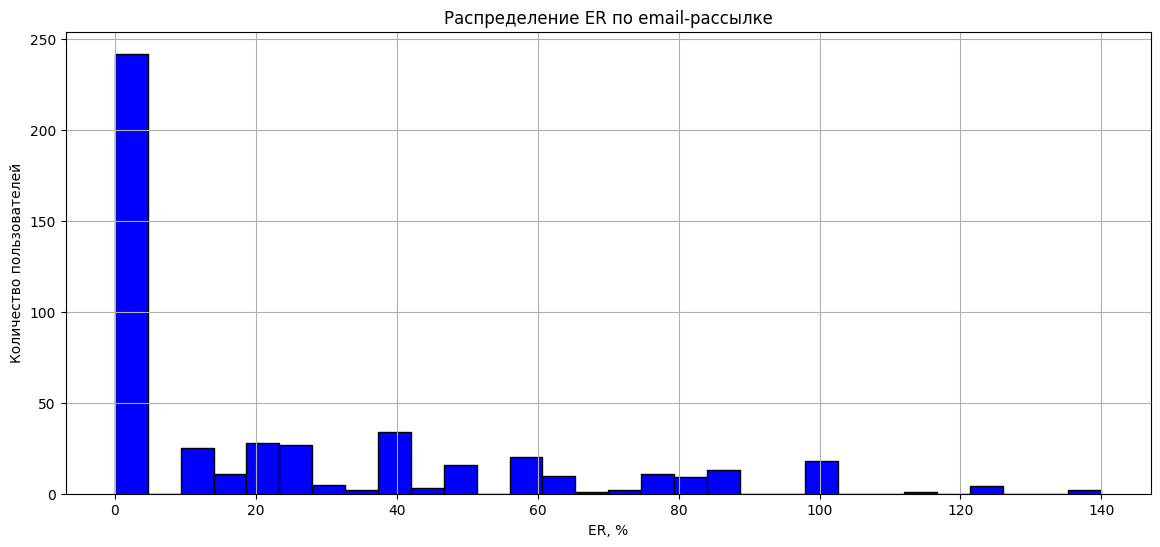

In [37]:
# задаем размеры графика
plt.figure(figsize=(14, 6))

# строим гистограмму
plt.hist(users_email['ER, %'], bins=30, color = 'blue', edgecolor = 'black')

# задаем название, оси графику
plt.title("Распределение ER по email-рассылке")
plt.xlabel("ER, %")
plt.ylabel("Количество пользователей")

# добавляем сетку
plt.grid(True)

# выводим график
plt.show()

По графику видно, что большая часть юзеров, так и не совершила ни одного целевого действия, поэтому по графику становится сложно понять, сколько именно пользователей имеют тот или иной ER – далее мы построим гистограмму без учета юзеров с ER = 0%

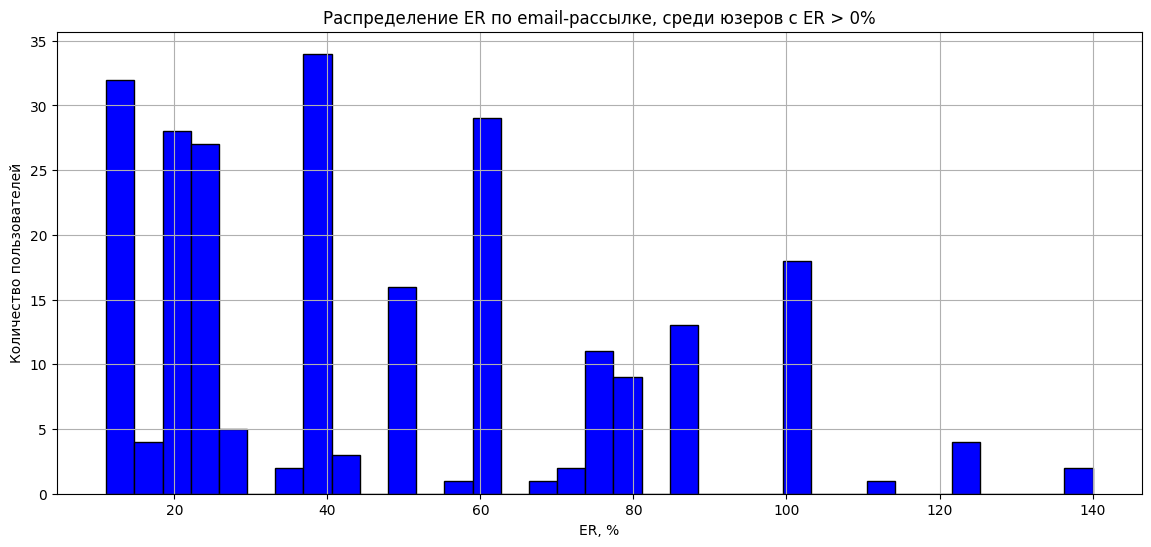

In [38]:
# задаем размеры графика
plt.figure(figsize=(14, 6))

# строим гистограмму по юзерам с ER более 0%
plt.hist(users_email[users_email['ER, %'] > 0]['ER, %'], bins=35, color='blue', edgecolor='black')

# задаем название, оси графику
plt.title("Распределение ER по email-рассылке, среди юзеров с ER > 0%")
plt.xlabel("ER, %")
plt.ylabel("Количество пользователей")

# добавляем сетку
plt.grid(True)

# выводим график
plt.show()


Данный график уже более наглядный, по нему можно сделать следующие выводы:

- большая часть активных юзеров имеет ER до 40% - что как раз-таки является медианным значением для данного сегмента;
- среди наших юзеров порядка 20 человек с ER = 100% и еще порядка 10 с ER от 110 до 140%

##### Выводы по ER email-рассылки


- из 484 юзеров почти **250 являются неактивными** - имеют ER = 0;
- в среднем коэффициент вовлеченности (ER) подписчиков нашей email-рассылки составляет **23,88%**, медианное же значение - **5,55%**, а вот **25% самых активных юзеров имеют ER > 40%**;
- по активным юзерам (имеют ER > 0) - медианное значение ER = **40%**;
- среди всех юзеров email-рассылки лишь **20 имеют ER > 100%**;

### Анализ данных viber-рассылки

#### Расчет метрик по кампаниям по viber-рассылке

In [39]:
# создадим отдельную таблицу с расчетом метрик по viber-рассылкам по рекламным кампаниям
viber_campaign_analysis = (viber_filtred.groupby('campaign_id')
              .agg({
                  'viber_delivered': 'count',
                  'viber_read': 'sum',
                  'main_link_clicked': 'sum'
              })
              .rename(columns={
                  'viber_delivered': 'am_sent',
                  'viber_read': 'am_opened',
                  'main_link_clicked': 'am_clicked',
                               })
)

# добавим строку с суммарным значением
viber_campaign_analysis.loc['total'] = viber_campaign_analysis.sum()

# применяем функцию и расчитываем open rate, click-through rate и click-to-open rate viber-рассылки
metrics(viber_campaign_analysis)

viber_campaign_analysis

,am_sent,am_opened,am_clicked,"open_rate,%","ctr,%","click_2open_rate,%"
campaign_id,,,,,,
-106,4,0,0,0.00,0.00,NaN
-105,1752,223,14,12.73,0.80,6.28
-104,9,1,1,11.11,11.11,100.00
-102,1713,283,26,16.52,1.52,9.19
-86,4,0,0,0.00,0.00,NaN
-85,1755,257,24,14.64,1.37,9.34
-46,4,0,0,0.00,0.00,NaN
-45,589,111,14,18.85,2.38,12.61
22,4,0,0,0.00,0.00,NaN


#### Графики по viber-рассылкам

In [40]:
# строим график по open rate по viber-рассылкам
campaign_analysis_plot(viber_campaign_analysis, 'open_rate,%', 'open rate', 'viber')

In [41]:
# строим график по CTR по viber-рассылкам
campaign_analysis_plot(viber_campaign_analysis, 'ctr,%', 'CTR', 'viber')

In [42]:
# строим график по click-to-open-rate по viber-рассылкам
campaign_analysis_plot(viber_campaign_analysis, 'click_2open_rate,%', 'click-to-open-rate', 'viber')

#### Расчет метрик в Q4 по viber-рассылке

In [43]:
# создадим отдельную таблицу с расчетом метрик по viber-рассылкам по рекламным кампаниям в Q4
q4_viber = (viber_filtred.query('quadrant == "Q4"')
              .groupby('campaign_id')
              .agg({
                  'viber_delivered': 'count',
                  'viber_read': 'sum',
                  'main_link_clicked': 'sum'
              })
              .rename(columns={
                  'viber_delivered': 'am_sent',
                  'viber_read': 'am_opened',
                  'main_link_clicked': 'am_clicked',
                               })
)

# добавим строку с суммарным значением
q4_viber.loc['total'] = q4_viber.sum()

# применяем функцию и расчитываем open rate, click-through rate и click-to-open rate viber-рассылки
metrics(q4_viber)

q4_viber

,am_sent,am_opened,am_clicked,"open_rate,%","ctr,%","click_2open_rate,%"
campaign_id,,,,,,
-106,4,0,0,0.00,0.00,NaN
-105,301,33,3,10.96,1.00,9.09
-104,5,0,0,0.00,0.00,NaN
-102,295,45,3,15.25,1.02,6.67
-86,4,0,0,0.00,0.00,NaN
-85,301,42,7,13.95,2.33,16.67
-46,4,0,0,0.00,0.00,NaN
-45,264,43,6,16.29,2.27,13.95
22,4,0,0,0.00,0.00,NaN


##### Графики по Q4 по viber-рассылкам

In [44]:
# строим график по open rate по viber-рассылкам в Q4
campaign_analysis_plot(q4_viber, 'open_rate,%', 'open rate', 'viber', 'Q4')

In [45]:
# строим график по CTR по viber-рассылкам в Q4
campaign_analysis_plot(q4_viber, 'ctr,%', 'CTR', 'viber', 'Q4')

In [46]:
# строим график по click-to-open-rate по viber-рассылкам в Q4
campaign_analysis_plot(q4_viber, 'click_2open_rate,%', 'click-to-open-rate', 'viber', 'Q4')

#### Расчет ER по viber-рассылке

Мы переходим к расчету ER по вайберу, однако перед этим стоит учесть специфику данных по данному каналу коммуникации. Поскольку описание данных не было предоставлены, ниже будут мои доводы по поводу содержимого в данных:

У нас есть следующие столбцы с булевыми значениями "0" и "1":

- "main_link_clicks" и "main_link_clicked" – я предполагаю, что "0" - не было клика, "1" - пользователь кликнул по ссылке из сообщения. Однако загвостка в том, что сумма по этим столбцам (кол-во кликов) - различается, поэтому перестрахуемся и для расчетов будем использовать столбец с меньшим кол-вом кликов - **"main_link_clicked"**;  
- "other_link_clicks" – в наших данных никто не кликнул по дополнительным ссылкам - возможно, их и не было в сообщениях, в расчетах данный показатель не будет использован;
- "viber_sent" – "0" - сообщение не отправилось, "1" - сообщение отправилось;
- "viber_delivered" – "0" - сообщение не дошло до пользователя, "1" - сообщение дошло до пользователя;
- "viber_read" – "0" - юзер не прочитал сообщение, "1" - юзер  прочитал сообщение.

Поскольку не все сообщения были отправлены, а уж, тем более, не все из них дошли - то мы рассмотрим 2 варианта:

1. в знаменателе будем использовать кол-во сообщений по "viber_sent"  это позволит получить метрики с учетом наших расходов, ведь сообщения, которые не отправились по какой-либо причине, также требуют каких-либо операционных затрат - хоть и небольших;
2. в знаменателе будем использовать кол-во сообщений по "viber_delivered" – это позволит получить более точные показатели вовлеченности (активности) юзеров в данном канале.

**Вариант №1 - в знаменателе "viber_sent"**

In [47]:
# создадим отдельную таблицу с расчетом метрик по viber-рассылке (в знаменателе "viber_sent")
users_viber = (viber_filtred
              .groupby('contact_id', as_index=False)
              .agg({
                  'viber_sent': 'sum',
                  'viber_read': 'sum',
                  'main_link_clicked': 'sum'
              })
              .rename(columns={
                  'contact_id': 'user_id',
                  'viber_sent': 'am_sent',
                  'viber_read': 'am_opened',
                  'main_link_clicked': 'am_clicked'
                               })
)

# расчитаем ER по viber-рассылке
engagement_rate(users_viber, 1, 2)

In [48]:
# выведем общую стат. информацию по столбцу с коэф. вовлеченности viber
users_viber['ER, %'].describe()

count    2779.000000
mean       19.546024
std        41.257486
min         0.000000
25%         0.000000
50%         0.000000
75%        16.700000
max       300.000000
Name: ER, %, dtype: float64

In [49]:
# строим бокс плот по коэффициенту вовлеченности viber
fig = px.box(users_viber, y='ER, %', points='outliers',
             color_discrete_sequence=px.colors.qualitative.Antique)
fig.update_layout(
    title='Распределение коэффициента вовлеченности по viber',
    xaxis_title='Viber-рассылка',
    yaxis_title='коэффициент вовлеченности, %',
)

fig.show()

Ситуация аналогичная – в среднем коэффициент вовлеченности (ER) юзеров из нашей базы viber-рассылки составляет **19,54%**, медианное же значение в данном случае равно **0**. Из этого можно сделать следующие выводы:
- у нас есть огромный "хвост" из юзеров, которые не целевых действий, однако на этом моменте стоит вспомнить, что многие сообщения так и не дошли до наших юзеров, поэтому они и не совершили никаких действий, а вот среди тех 25% юзеров, видимо, до кого сообщения дошли, коэффициентом вовлеченности более **16,7%** - которые и перекашивают наше распределение в данном случае;
- распределение имеет положительную асимметрию - правосторонний скос.

Далее мы посчитаем ER с viber_delivered в знаменателе, а также построим графики распределения вовлечнности юзеров

**Вариант №2 - в знаменателе "viber_delivered"**

In [50]:
# создадим отдельную таблицу с расчетом метрик по viber-рассылке (в знаменателе "viber_delivered")
users_viber = (viber_filtred
              .groupby('contact_id', as_index=False)
              .agg({
                  'viber_delivered': 'sum',
                  'viber_read': 'sum',
                  'main_link_clicked': 'sum'
              })
              .rename(columns={
                  'contact_id': 'user_id',
                  'viber_delivered': 'am_sent',
                  'viber_read': 'am_opened',
                  'main_link_clicked': 'am_clicked'
                               })
)

# расчитаем ER по viber-рассылке
engagement_rate(users_viber, 1, 2)

In [51]:
# выведем общую стат. информацию по столбцу с коэф. вовлеченности viber
users_viber['ER, %'].describe()

count    1220.000000
mean       49.279754
std        55.989162
min         0.000000
25%         0.000000
50%        33.300000
75%       100.000000
max       300.000000
Name: ER, %, dtype: float64

In [52]:
# строим бокс плот по коэффициенту вовлеченности
fig = px.box(users_viber, y='ER, %', points='outliers',
             color_discrete_sequence=px.colors.qualitative.Antique)
fig.update_layout(
    title='Распределение коэффициента вовлеченности по viber',
    xaxis_title='Viber-рассылка',
    yaxis_title='коэффициент вовлеченности, %',
)

fig.show()

Ситуация аналогичная – в среднем коэффициент вовлеченности (ER) юзеров из нашей базы viber-рассылки составляет **49,28%**, медианное же значение в данном случае не сильно меньше - **33,3%**. Из этого можно сделать следующие выводы:
- у нас уже меньший "хвост" из юзеров, которые соверашают очень мало целевых действий, но также 25% крайне активных юзеров - с коэффициентом вовлеченности более 100% - которые и перекашивают наше распределение;
- распределение имеет положительную асимметрию - правосторонний скос;

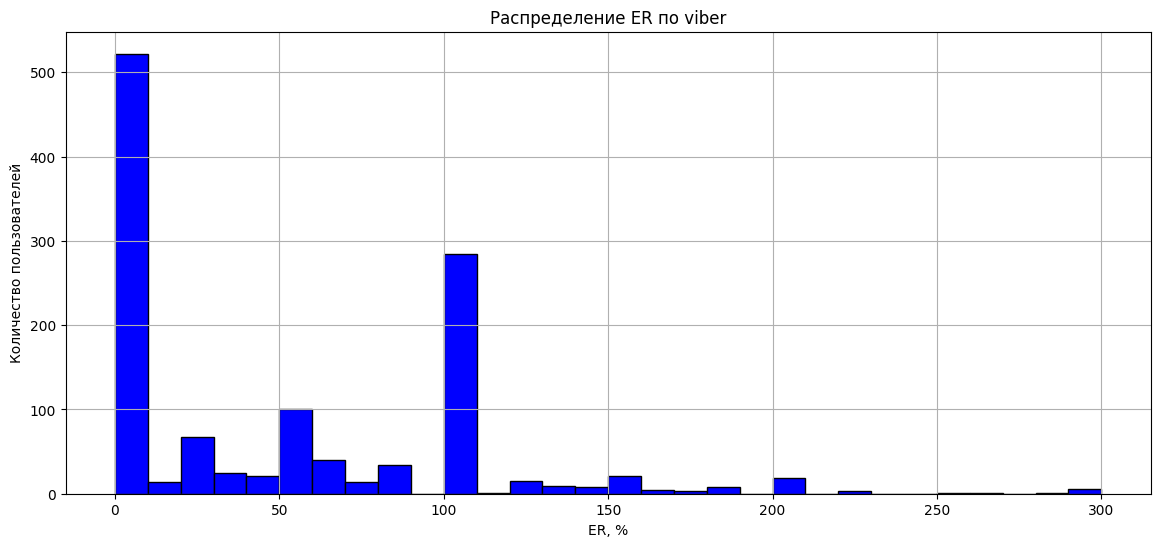

In [53]:
# задаем размеры графика
plt.figure(figsize=(14, 6))

# строим гистограмму
plt.hist(users_viber['ER, %'], bins=30, color = 'blue', edgecolor = 'black')

# задаем название, оси графику
plt.title("Распределение ER по viber")
plt.xlabel("ER, %")
plt.ylabel("Количество пользователей")

# добавляем сетку
plt.grid(True)

# выводим график
plt.show()

Та же самая ситуация, что и по email-рассылке – большая часть юзеров, так и не совершила ни одного целевого действия, поэтому по графику становится сложно понять, сколько именно пользователей имеют тот или иной ER – далее мы построим гистограмму без учета юзеров с ER = 0%

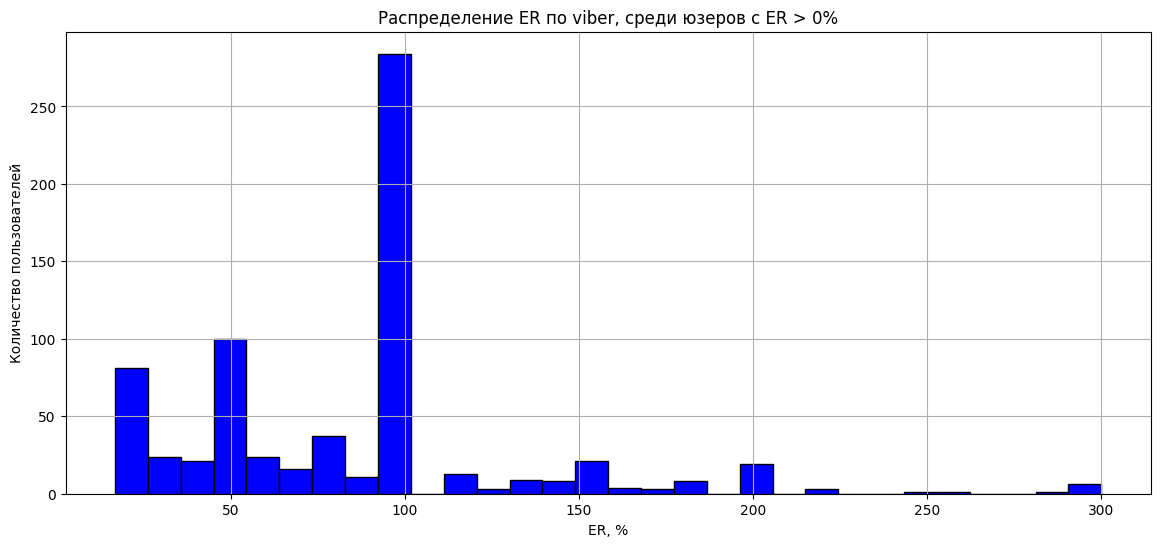

In [54]:
# задаем размеры графика
plt.figure(figsize=(14, 6))

# строим гистограмму по юзерам с ER более 0%
plt.hist(users_viber[users_viber['ER, %'] > 0]['ER, %'], bins=30, color='blue', edgecolor='black')

# задаем название, оси графику
plt.title("Распределение ER по viber, среди юзеров с ER > 0%")
plt.xlabel("ER, %")
plt.ylabel("Количество пользователей")

# добавляем сетку
plt.grid(True)

# выводим график
plt.show()


##### Выводы по ER viber-рассылки


Поскольку у нас было 2 варианта рассчета, то сначала рассмотрим итоги по подсчетам с "viber_sent" в знаменателе (ситуация, когда мы не учитываем, дошло до юзера сообщение или нет – ведь мы в любом случае несем операционные затраты).

- в среднем коэффициент вовлеченности (ER) юзеров из нашей базы viber-рассылки составляет **19,54%**, медианное же значение в данном случае равно **0**, а вот **25% самых активных юзеров имеют ER > 16,7%**.

В случае, когда мы учитваем только те сообщения, которые дошли до наших юзеров, мы получили следующие данные:

- в среднем коэффициент вовлеченности (ER) юзеров из нашей базы viber-рассылки составляет **49,28%**, медианное же значение в данном случае не сильно меньше - **33,3%**, а вот **25% самых активных юзеров имеют ER > 100%**.





### Анализ данных по объединенной таблице


#### Создание таблиц с месячными данными по email и viber-рассылкам


In [55]:
# создадим отдельную таблицу с расчетом метрик по email-рассылке по месяцам
email_monthly = (email_filtred.groupby(
    [email_filtred['send_date'].dt.to_period('M'), 'contact_id'])
    .agg({
        'email_sent': 'sum',
        'email_opened': 'sum',
        'email_clicked': 'sum'
        })
    .reset_index()
    .rename(columns={
        'send_date': 'month',
        'contact_id': 'user_id',
        'email_sent': 'am_sent',
        'email_opened': 'am_opened',
        'email_clicked': 'am_clicked'
        })
)

# расчитаем ER по email-рассылке по месяцам
engagement_rate(email_monthly, 1, 2)

# переименуем столбец, чтобы сделать срез по юзерам с ER > 0%
email_monthly = email_monthly.rename(columns={'ER, %': 'er'})

In [57]:
def vertical_bars(df, time_period, name_of_column, channel, title, type_user=None):

    custom_colors = ['rgb(8, 29, 88)', 'rgb(8, 48, 227)', 'rgb(8, 81, 156)']

    fig = go.Figure(go.Bar(
        x=df[time_period],
        y=df[name_of_column],
        name=channel,
        text=df[name_of_column],
        textposition='inside',
        marker=dict(
            color=df.index,
            colorscale=custom_colors,
            reversescale=True
        )

    ))

    # обновляем лэйаут
    if type_user is None:
      fig.update_layout(
          title=f'Динамика изменения {title} по {channel}-рассылке',
          xaxis_title='месяц',
          yaxis_title='количество юзеров',
          yaxis=dict(
            title_font=dict(size=12)
            ),
          height=650,
          width=1150
          )
    else:
      fig.update_layout(
          title=f'Динамика изменения {title} по {channel}-рассылке по {type_user}',
          xaxis_title='месяц',
          yaxis_title='количество юзеров',
          yaxis=dict(
            title_font=dict(size=12)
            ),
          height=650,
          width=1150
    )

    fig.show()

In [62]:
# считаем кол-во пользователей с ER > 0% по месяцам
active_email_monthly = (email_monthly.query('er > 0')
            .groupby('month', as_index=False)
            .agg({'user_id': 'nunique'}))

# изменим тип данных в столбце с месяцом
active_email_monthly['month'] = pd.to_datetime(active_email_monthly['month'].astype(str), format="%Y-%m")
active_email_monthly

,month,user_id
0,2022-10-01,184
1,2022-11-01,120
2,2022-12-01,150


In [63]:
# строим график количества активных юзеров email-рассылки по месяцам
vertical_bars(active_email_monthly, 'month', 'user_id', 'email', 'количества активных юзеров')

In [59]:
# создадим отдельную таблицу с расчетом метрик по viber-рассылке по месяцам
viber_monthly = (viber_filtred.groupby(
    [viber_filtred['send_date'].dt.to_period('M'), 'contact_id'])
    .agg({
        'viber_delivered': 'sum',
        'viber_read': 'sum',
        'main_link_clicked': 'sum'
        })
    .reset_index()
    .rename(columns={
        'send_date': 'month',
        'contact_id': 'user_id',
        'viber_delivered': 'am_sent',
        'viber_read': 'am_opened',
        'main_link_clicked': 'am_clicked'
        })
)

# расчитаем ER по viber-рассылке по месяцам
engagement_rate(viber_monthly, 1, 2)

# переименуем столбец, чтобы сделать срез по юзерам с ER > 0%
viber_monthly = viber_monthly.rename(columns={'ER, %': 'er'})

In [64]:
# считаем кол-во пользователей с ER > 0% по месяцам
active_viber_monthly = (viber_monthly.query('er > 0')
            .groupby('month', as_index=False)
            .agg({'user_id': 'nunique'}))

# изменим тип данных в столбце с месяцом
active_viber_monthly['month'] = pd.to_datetime(active_viber_monthly['month'].astype(str), format="%Y-%m")
active_viber_monthly

,month,user_id
0,2022-10-01,553
1,2022-11-01,317
2,2022-12-01,435


In [65]:
# строим график количества активных юзеров viber-рассылки по месяцам
vertical_bars(active_viber_monthly, 'month', 'user_id', 'viber', 'количества активных юзеров')

Таким образом, у нас в разы больше активных юзеров (ER > 0) в viber, чем по email-рассылке. Однако не стоит забывать, что у нас было гораздо больше данных по viber - **13360** строк (по email-рассылке лишь **2919**).

Далее мы посмотрим более детальные информацию по неделям

#### Создание таблиц с недельными данными по email и viber-рассылкам


In [66]:
# создадим отдельную таблицу с расчетом метрик по email-рассылке по неделям
email_weekly = (email_filtred.groupby(
    [email_filtred['send_date'].dt.to_period('W-MON').dt.start_time, 'contact_id'])
    .agg({
        'email_sent': 'sum',
        'email_opened': 'sum',
        'email_clicked': 'sum'
        })
    .reset_index()
    .rename(columns={
        'send_date': 'week',
        'contact_id': 'user_id',
        'email_sent': 'am_sent',
        'email_opened': 'am_opened',
        'email_clicked': 'am_clicked'
        })
)

# расчитаем ER по email-рассылке по неделям
engagement_rate(email_weekly, 1, 2)

# переименуем столбец, чтобы сделать срез по юзерам с ER > 0%
email_weekly = email_weekly.rename(columns={'ER, %': 'er'})

In [67]:
# смотрим на активность наших юзеров в email по неделям
all_email_weekly_metrics = (email_weekly.groupby('week', as_index=False)
            .agg({
                'user_id': 'nunique',
                'am_sent': 'sum',
                'am_opened': 'sum',
                'am_clicked': 'sum',
                'er': 'mean'
                }))
all_email_weekly_metrics['er'] = round(all_email_weekly_metrics['er'], 2)
all_email_weekly_metrics

,week,user_id,am_sent,am_opened,am_clicked,er
0,2022-10-11,406,585,172,5,27.34
1,2022-10-18,274,288,69,5,28.83
2,2022-10-25,449,472,99,3,22.05
3,2022-11-15,215,216,75,11,45.12
4,2022-11-22,163,172,51,6,34.97
5,2022-12-20,448,917,191,6,21.95
6,2022-12-27,258,269,67,2,27.52


In [68]:
# строим график среднего ER всех юзеров email-рассылки по неделям
vertical_bars(all_email_weekly_metrics, 'week', 'er', 'email', 'среднего коэффициента вовлеченности', 'всем юзерам')

In [69]:
# посмотрим на активность юзеров с ER > 0 в email по неделям
active_email_weekly_metrics = (email_weekly.query('er > 0')
            .groupby('week', as_index=False)
            .agg({
                'am_sent': 'sum',
                'am_opened': 'sum',
                'am_clicked': 'sum',
                'er': 'mean'
                }))
active_email_weekly_metrics['er'] = round(active_email_weekly_metrics['er'], 2)
active_email_weekly_metrics

,week,am_sent,am_opened,am_clicked,er
0,2022-10-11,228,172,5,83.46
1,2022-10-18,69,69,5,114.49
2,2022-10-25,99,99,3,106.45
3,2022-11-15,75,75,11,129.33
4,2022-11-22,51,51,6,126.67
5,2022-12-20,257,191,6,79.30
6,2022-12-27,67,67,2,105.97


In [70]:
# строим график среднего ER активных юзеров email-рассылки по неделям
vertical_bars(active_email_weekly_metrics, 'week', 'er', 'email', 'среднего коэффициента вовлеченности', 'активным юзерам')

In [71]:
# создадим отдельную таблицу с расчетом метрик по viber-рассылке по неделям
viber_weekly = (viber_filtred.groupby(
    [viber_filtred['send_date'].dt.to_period('W-MON').dt.start_time, 'contact_id'])
    .agg({
        'viber_delivered': 'sum',
        'viber_read': 'sum',
        'main_link_clicked': 'sum'
        })
    .reset_index()
    .rename(columns={
        'send_date': 'week',
        'contact_id': 'user_id',
        'viber_delivered': 'am_sent',
        'viber_read': 'am_opened',
        'main_link_clicked': 'am_clicked'
        })
)

# расчитаем ER по viber-рассылке по неделям
engagement_rate(viber_weekly, 1, 2)

# переименуем столбец, чтобы сделать срез по юзерам с ER > 0%
viber_weekly = viber_weekly.rename(columns={'ER, %': 'er'})

In [72]:
# смотрим на активность наших юзеров в viber по неделям
all_viber_weekly_metrics = (viber_weekly.groupby('week', as_index=False)
            .agg({
                'user_id': 'nunique',
                'am_sent': 'sum',
                'am_opened': 'sum',
                'am_clicked': 'sum',
                'er': 'mean'
                }))
all_viber_weekly_metrics['er'] = round(all_viber_weekly_metrics['er'], 2)
all_viber_weekly_metrics

,week,user_id,am_sent,am_opened,am_clicked,er
0,2022-10-04,1617,681,284,27,51.25
1,2022-10-18,576,233,111,14,60.09
2,2022-10-25,2790,1146,450,49,48.79
3,2022-11-22,1651,1231,477,61,51.20
4,2022-11-29,1654,674,257,24,46.96
5,2022-12-20,1125,450,185,7,44.88
6,2022-12-27,1656,0,0,0,NaN


In [73]:
# строим график среднего ER активных юзеров viber-рассылки по неделям
vertical_bars(all_viber_weekly_metrics, 'week', 'er', 'viber', 'среднего коэффициента вовлеченности', 'всем юзерам')

In [74]:
# посмотрим на активность юзеров с ER > 0 в viber по неделям
active_viber_weekly_metrics = (viber_weekly.query('er > 0')
            .groupby('week', as_index=False)
            .agg({
                'am_sent': 'sum',
                'am_opened': 'sum',
                'am_clicked': 'sum',
                'er': 'mean'
                }))
active_viber_weekly_metrics['er'] = round(active_viber_weekly_metrics['er'], 2)
active_viber_weekly_metrics

,week,am_sent,am_opened,am_clicked,er
0,2022-10-04,284,284,27,119.78
1,2022-10-18,113,111,14,123.42
2,2022-10-25,463,450,49,119.32
3,2022-11-22,576,477,61,107.89
4,2022-11-29,260,257,24,117.58
5,2022-12-20,185,185,7,107.82


In [75]:
# строим график среднего ER активных юзеров viber-рассылки по неделям
vertical_bars(active_viber_weekly_metrics, 'week', 'er', 'viber', 'среднего коэффициента вовлеченности', 'активным юзерам')

#### Создание объединенной таблицы с информацией по email и viber-рассылкам


In [76]:
# создадим дф, в котором объединим информацию по двум каналам
combined_metrics = email_monthly.merge(viber_monthly, on='user_id', how='outer', indicator=True, suffixes=['_email', '_viber'])

In [77]:
# переименуем столбцы в таблице с данными по email-рассылке, чтобы заджойнить их
email_filtred = email_filtred.rename(columns={'contact_id': 'user_id', 'send_date': 'month'})

# переименуем столбцы в таблице с данными по viber-рассылке, чтобы заджойнить их
viber_filtred = viber_filtred.rename(columns={'contact_id': 'user_id', 'send_date': 'month'})

In [78]:
# создадим столбец с датой отправки email / viber
combined_metrics['month_email'] = combined_metrics['month_email'].fillna(combined_metrics['month_viber'])

# удалим лишний столбец
combined_metrics = combined_metrics.drop('month_viber', axis=1)

# переименуем столбец с датой коммуникации с пользователем
combined_metrics = combined_metrics.rename(columns={'month_email': 'month'})

# заполним пропуски "0"
combined_metrics = combined_metrics.fillna(0)

# удалим строки с пользователями, которые не были активны ни в email, ни в viber
combined_metrics = combined_metrics[(combined_metrics['er_email'] != 0) | (combined_metrics['er_viber'] != 0)]

In [79]:
# создадим переменную с строками, которые дублируют айди юзеров
rows_2_drop = (combined_metrics[combined_metrics['_merge'] == 'both'].drop_duplicates(subset=['user_id', 'month'], keep='first').index)

# удалим эти строки
combined_metrics = combined_metrics[~combined_metrics.index.isin(rows_2_drop)]

##### Расчет кол-ва вовлеченных юзеров по месяцам


In [86]:
# считаем кол-во пользователей с ER > 0% по месяцам
monthly_active = (combined_metrics.groupby('month', as_index=False)
            .agg({'user_id': 'nunique'}))

# изменим тип данных в столбце с месяцом
monthly_active['month'] = pd.to_datetime(monthly_active['month'].astype(str), format="%Y-%m")
monthly_active

,month,user_id
0,2022-10-01,649
1,2022-11-01,372
2,2022-12-01,543


In [88]:
# строим график среднего ER активных юзеров viber-рассылки по неделям
vertical_bars(monthly_active, 'month', 'user_id', '', 'количества активных юзеров')

#### Добавление информации о специальности и статусе заявки


In [89]:
# добавим к нашей объединенной таблице информацию
# по специальности и статусу заявки из таблицы с email-рассылке
merged_df = combined_metrics.merge(email_filtred[['user_id', 'status', 'speciality']], on='user_id', how='left', suffixes=['_email'])

# добавим к нашей объединенной таблице информацию
# по специальности и статусу заявки из таблицы с viber-рассылке
merged_df = merged_df.merge(viber_filtred[['user_id', 'status', 'speciality']], on='user_id', how='left', suffixes=['_email', '_viber'])

In [90]:
# создадим единый столбец со специальностью
merged_df['speciality_email'] = merged_df['speciality_email'].fillna(merged_df['speciality_viber'])

In [91]:
# создадим единый столбец со специальностью
merged_df['speciality_email'] = merged_df['speciality_email'].fillna(merged_df['speciality_viber'])

# создадим единый столбец со статусом
merged_df['status_email'] = merged_df['status_email'].fillna(merged_df['status_viber'])

# удалим лишние столбцы
merged_df = merged_df.drop('speciality_viber', axis=1)
merged_df = merged_df.drop('status_viber', axis=1)
merged_df = merged_df.drop('_merge', axis=1)

# переименуем столбцы со специальностью и статусом
merged_df = merged_df.rename(columns={'speciality_email': 'speciality', 'status_email': 'status'})

##### Расчет кол-ва вовлеченных юзеров по месяцам с учетом специальности и статуса

In [96]:
# считаем кол-во пользователей с ER > 0% по месяцам с учетом специальности и статуса
status_spec = (merged_df.groupby(['month', 'status', 'speciality'], as_index=False)
            .agg({'user_id': 'nunique'}))

# изменим тип данных в столбце с месяцом
status_spec['month'] = pd.to_datetime(status_spec['month'].astype(str), format="%Y-%m")
status_spec

,month,status,speciality,user_id
0,2022-10-01,Нецелевой,дерматолог,23
1,2022-10-01,Нецелевой,лор,6
2,2022-10-01,Целевой,дерматолог,432
3,2022-10-01,Целевой,лор,188
4,2022-11-01,Нецелевой,дерматолог,20
5,2022-11-01,Целевой,дерматолог,337
6,2022-11-01,Целевой,лор,15
7,2022-12-01,Нецелевой,дерматолог,17
8,2022-12-01,Нецелевой,лор,7
9,2022-12-01,Целевой,дерматолог,333


In [194]:
def plot_status_specialty(df):
    fig = go.Figure()

    specialties = df['speciality'].unique()
    statuses = df['status'].unique()

    colors = {
    'дерматолог': {'Нецелевой': 'rgb(37, 52, 148)', 'Целевой': 'rgb(8, 48, 227)'},
    'лор': {'Нецелевой': 'rgb(255, 255, 204)', 'Целевой': 'rgb(65, 182, 196)'}
}


    for specialty in specialties:
        for status in statuses:
            specialty_status_df = df[(df['speciality'] == specialty) & (df['status'] == status)]

            fig.add_trace(go.Bar(
                x=specialty_status_df['month'],
                y=specialty_status_df['user_id'],
                name=f'{specialty} - {status}',
                marker=dict(
                    color=colors[specialty][status]
                    ),
                text=specialty_status_df['user_id'],
                textposition='outside',
            ))

    fig.update_layout(
        title='Динамика изменения количества вовлеченных пользователей по специальности и статусу по месяцам',
        xaxis_title='месяц',
        yaxis_title='количество юзеров',
        height=500,
        width=1250,
        legend=dict(
            x=0.1,
            y=-0.2,
            orientation='h',
            bgcolor='rgba(255, 255, 255, 0)',
            traceorder='normal'
        )
    )

    fig.show()

In [195]:
plot_status_specialty(status_spec)

In [180]:
def metrics_for_grouped(df, first_email_action_weight, second_email_action_weight, first_viber_action_weight, second_viber_action_weight):
  df['total_sent'] = df['am_sent_email'] + df['am_sent_viber']
  df['final_er, %'] = (round(((df['am_opened_email'] * first_email_action_weight) + (df['am_clicked_email'] * second_email_action_weight) +
                     (df['am_opened_viber'] * first_viber_action_weight) + (df['am_clicked_viber'] * second_viber_action_weight)) / df['total_sent'] * 100, 1))
  df['email_er, %'] = (round(((df['am_opened_email'] * first_email_action_weight) + (df['am_clicked_email'] * second_email_action_weight)) / df['total_sent'] * 100, 1))
  df['viber_er, %'] = (round(((df['am_opened_viber'] * first_viber_action_weight) + (df['am_clicked_viber'] * second_viber_action_weight)) / df['total_sent'] * 100, 1))

##### Расчет итоговых метрик и ER по каждой специальности


In [181]:
speciality_grpd = (merged_df.groupby('speciality')
                           .agg(
                              {
                                  'am_sent_email': 'sum',
                                  'am_opened_email': 'sum',
                                  'am_clicked_email': 'sum',
                                  'am_sent_viber': 'sum',
                                  'am_opened_viber': 'sum',
                                  'am_clicked_viber': 'sum',

                              }
                           )
)

# применим функцию для расчета ER по специальности
metrics_for_grouped(speciality_grpd, 1, 2, 1, 2)

# выводим получившийся результат
speciality_grpd

,am_sent_email,am_opened_email,am_clicked_email,am_sent_viber,am_opened_viber,am_clicked_viber,total_sent,"final_er, %","email_er, %","viber_er, %"
speciality,,,,,,,,,,
дерматолог,101375.0,49568.0,2902.0,35939.0,23740.0,2555.0,137314.0,61.3,40.3,21.0
лор,1338.0,547.0,20.0,1217.0,1073.0,80.0,2555.0,71.2,23.0,48.3


In [198]:
speciality_monthly_grpd = (merged_df.groupby(['speciality', 'month'], as_index=False)
                           .agg(
                              {
                                  'am_sent_email': 'sum',
                                  'am_opened_email': 'sum',
                                  'am_clicked_email': 'sum',
                                  'am_sent_viber': 'sum',
                                  'am_opened_viber': 'sum',
                                  'am_clicked_viber': 'sum',

                              }
                           )
)

# применим функцию для расчета ER по специальности в динамике по месяцам
metrics_for_grouped(speciality_monthly_grpd, 1, 2, 1, 2)

# выводим получившийся результат
speciality_monthly_grpd

,speciality,month,am_sent_email,am_opened_email,am_clicked_email,am_sent_viber,am_opened_viber,am_clicked_viber,total_sent,"final_er, %","email_er, %","viber_er, %"
0,дерматолог,2022-10,54993.0,24826.0,1078.0,14768.0,9483.0,890.0,69761.0,54.8,38.7,16.1
1,дерматолог,2022-11,9685.0,7276.0,1004.0,10703.0,7564.0,933.0,20388.0,91.8,45.5,46.3
2,дерматолог,2022-12,36697.0,17466.0,820.0,10468.0,6693.0,732.0,47165.0,57.8,40.5,17.3
3,лор,2022-10,634.0,265.0,20.0,560.0,466.0,48.0,1194.0,72.6,25.5,47.1
4,лор,2022-11,132.0,18.0,0.0,114.0,114.0,10.0,246.0,61.8,7.3,54.5
5,лор,2022-12,572.0,264.0,0.0,543.0,493.0,22.0,1115.0,71.8,23.7,48.2


In [183]:
# изменим тип данных на соответствующий дате
speciality_monthly_grpd['month'] = speciality_monthly_grpd['month'].astype(str)
speciality_monthly_grpd['month'] = pd.to_datetime(speciality_monthly_grpd['month'])

In [184]:
# создадим отдельную переменную с данными по спецмальности "лор" для построения графика
lor = (speciality_monthly_grpd[speciality_monthly_grpd['speciality'] == 'лор']
                             .iloc[:, [0] + [1] + list(range(9, 12))])

In [185]:
# создадим отдельную переменную с данными по спецмальности "дерматолог" для построения графика
drmtlg = (speciality_monthly_grpd[speciality_monthly_grpd['speciality'] == 'дерматолог']
                             .iloc[:, [0] + [1] + list(range(9, 12))])

##### График динамики ER по специальности "лор"


In [196]:
# строим график по специальности "лор"
fig = px.line(lor, x="month", y=["final_er, %", "email_er, %", "viber_er, %"],
              color_discrete_sequence=px.colors.qualitative.G10)

fig.update_layout(
    xaxis_title='месяц',
    yaxis_title='ER, %',
    legend_title='название канала',
    title='Динамика изменения коэффициента вовлеченности по специальности "лор"'
)

new = {'final_er, %':'суммарный ER, %', 'email_er, %': 'ER по email, %',
       'viber_er, %': 'ER по viber, %'}
fig.for_each_trace(lambda t: t.update(name = new[t.name]))

fig.show()

##### График динамики ER по специальности "дерматолог"


In [197]:
# строим график по специальности "дерматолог"
fig = px.line(drmtlg, x="month", y=["final_er, %", "email_er, %", "viber_er, %"],
              color_discrete_sequence=px.colors.qualitative.G10)

fig.update_layout(
    xaxis_title='месяц',
    yaxis_title='ER, %',
    legend_title='название канала',
    title='Динамика изменения коэффициента вовлеченности по специальности "дерматолог"'
)

new = {'final_er, %':'суммарный ER, %', 'email_er, %': 'ER по email, %',
       'viber_er, %': 'ER по viber, %'}
fig.for_each_trace(lambda t: t.update(name = new[t.name]))

fig.show()

### Итоги исследовательского анализа данных

---

### Почему из 4 специальностей в анализе рассматривались лишь 2?

In [ ]:
# посмотрим на значения столбца со специальностью
viber_df['speciality'].unique()

In [ ]:
# создадим список столбцов, по которым нам интересно посмотреть сумму
# необходимо для анализа данных
cl_list = ['main_link_clicked', 'viber_sent', 'viber_delivered', 'viber_read']

In [ ]:
# считаем активность по специальности "хирург" - которой нет в анализе
surgen_sum = viber_filtred[viber_filtred['speciality'] == 'хирург'][cl_list].sum()
surgen_sum

In [ ]:
# считаем активность по специальности "аллерголог" - которой нет в анализе
allerg_sum = viber_filtred[viber_filtred['speciality'] == 'аллерголог'][cl_list].sum()
allerg_sum

Таким образом, по выводам выше можно понять, что данных по специальностям "хирург" и "аллерголог" практически нет, но что более важно - н**и один из пользователей не проявил никакой активности, а следовательно, данные по этим специальностям были исключены на этапе предобработки данных**